<a href="https://colab.research.google.com/github/damola936/50usastates/blob/master/sentiment_analysisipynb.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import kagglehub
import warnings

# Download latest version
path = kagglehub.dataset_download("jocelyndumlao/shoppingappreviews-dataset")
warnings.filterwarnings("ignore")

print("Path to dataset files:", path)

100%|██████████| 142M/142M [00:02<00:00, 50.8MB/s]

Extracting files...


Path to dataset files: /root/.cache/kagglehub/datasets/jocelyndumlao/shoppingappreviews-dataset/versions/1


In [ ]:
import os

files = os.listdir(path)
print(files)

['ShoppingAppReviews Dataset']


In [ ]:
# Paths
csv_files = [
    "ShoppingAppReviews Dataset/ShoppingAppReviews/csv/Alibaba.csv",
    "ShoppingAppReviews Dataset/ShoppingAppReviews/csv/Aliexpress.csv",
    "ShoppingAppReviews Dataset/ShoppingAppReviews/csv/Myntra.csv",
    "ShoppingAppReviews Dataset/ShoppingAppReviews/csv/Flipkart.csv",
    "ShoppingAppReviews Dataset/ShoppingAppReviews/csv/Meesho.csv",
    "ShoppingAppReviews Dataset/ShoppingAppReviews/csv/Lazada.csv",
    "ShoppingAppReviews Dataset/ShoppingAppReviews/csv/Amazon shopping.csv",
    "ShoppingAppReviews Dataset/ShoppingAppReviews/csv/Snapdeal.csv",
    "ShoppingAppReviews Dataset/ShoppingAppReviews/csv/Shein.csv",
    "ShoppingAppReviews Dataset/ShoppingAppReviews/csv/Daraz Online Shopping App.csv",
    "ShoppingAppReviews Dataset/ShoppingAppReviews/csv/Walmart.csv"
]
json_files = [
    "ShoppingAppReviews Dataset/ShoppingAppReviews/json/Alibaba.json",
    "ShoppingAppReviews Dataset/ShoppingAppReviews/json/Aliexpress.json",
    "ShoppingAppReviews Dataset/ShoppingAppReviews/json/Daraz Online Shopping App.json",
    "ShoppingAppReviews Dataset/ShoppingAppReviews/json/Myntra.json",
    "ShoppingAppReviews Dataset/ShoppingAppReviews/json/Lazada.json",
    "ShoppingAppReviews Dataset/ShoppingAppReviews/json/Amazon shopping.json",
    "ShoppingAppReviews Dataset/ShoppingAppReviews/json/Flipkart.json",
    "ShoppingAppReviews Dataset/ShoppingAppReviews/json/Meesho.json",
    "ShoppingAppReviews Dataset/ShoppingAppReviews/json/Walmart.json",
    "ShoppingAppReviews Dataset/ShoppingAppReviews/json/Shein.json",
    "ShoppingAppReviews Dataset/ShoppingAppReviews/json/Snapdeal.json"
]

In [ ]:
import pandas as pd

csv_data = []
for file in csv_files:
    csv_data.append(pd.read_csv(path + "/" + file))

json_data = []
for file in json_files:
    json_data.append(pd.read_json(path + "/" + file))

full_data = pd.concat(csv_data + json_data, ignore_index=True)

full_data.head()

,reviewId,content,score,thumbsUpCount,at,replyContent,repliedAt,appName,Alibaba,Aliexpress,Daraz Online Shopping App,Myntra,Lazada,Amazon shopping,Flipkart,Meesho,Walmart,Shein,Snapdeal
0,275f465b-a58b-439e-ae7c-f9f6dcf2634d,Trying to use the on website is almost impossi...,1.0,39.0,1.720996e+12,"Hi, we are sorry to hear that. Do share additi...",1.721048e+12,Alibaba,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,e6c13852-277e-451a-b8d5-dd92aea75402,Had to uninstall due to the amount of notifica...,3.0,60.0,1.720502e+12,"Hi, we are sorry to hear that. Do share additi...",1.721051e+12,Alibaba,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,254b3705-c54b-4ce4-8982-5b468d38231d,I order and it takes too long the shpping days...,1.0,7.0,1.721866e+12,NaN,NaN,Alibaba,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,c83c1e64-6aa3-42e8-9a56-0385a297b87b,Buyer beware! They have tons of listings that ...,1.0,2301.0,1.611569e+12,NaN,NaN,Alibaba,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,7a65dce8-3f09-4e4e-a263-55efebc13c65,It's all around a great app except for the fac...,4.0,1859.0,1.545438e+12,Thanks for your feedback. Could you tell us mo...,1.515586e+12,Alibaba,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


### Evaluating missing data

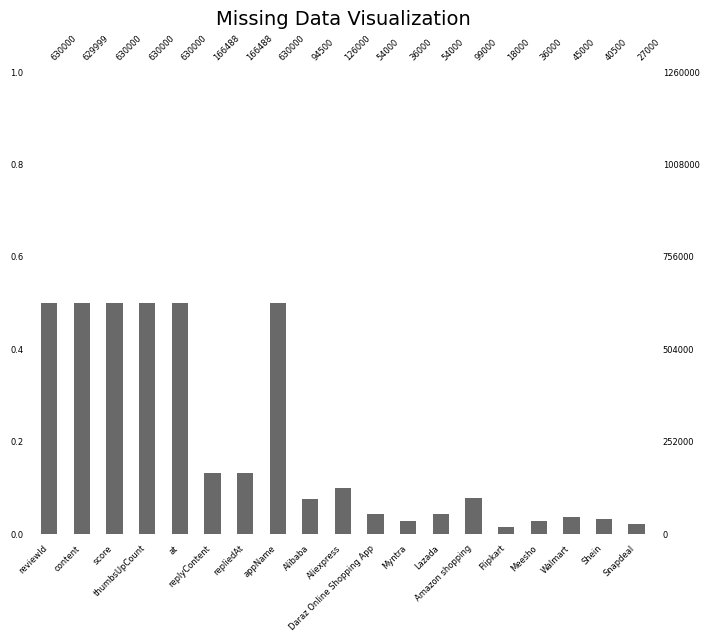

In [ ]:
import missingno as msno
import matplotlib.pyplot as plt

fig, ax = plt.subplots(figsize=(8, 6))
msno.bar(full_data, ax=ax, fontsize=6)
plt.title("Missing Data Visualization", fontsize=14)
plt.show()

### Fixing Missing Values

In [ ]:
# Dropping samples that have missing values with respect to content and score
full_data.dropna(subset=["content", "score"], inplace=True)
full_data.isna().sum()

,0
reviewId,0
content,0
score,0
thumbsUpCount,0
at,0
replyContent,463511
repliedAt,463511
appName,0
Alibaba,629999
Aliexpress,629999


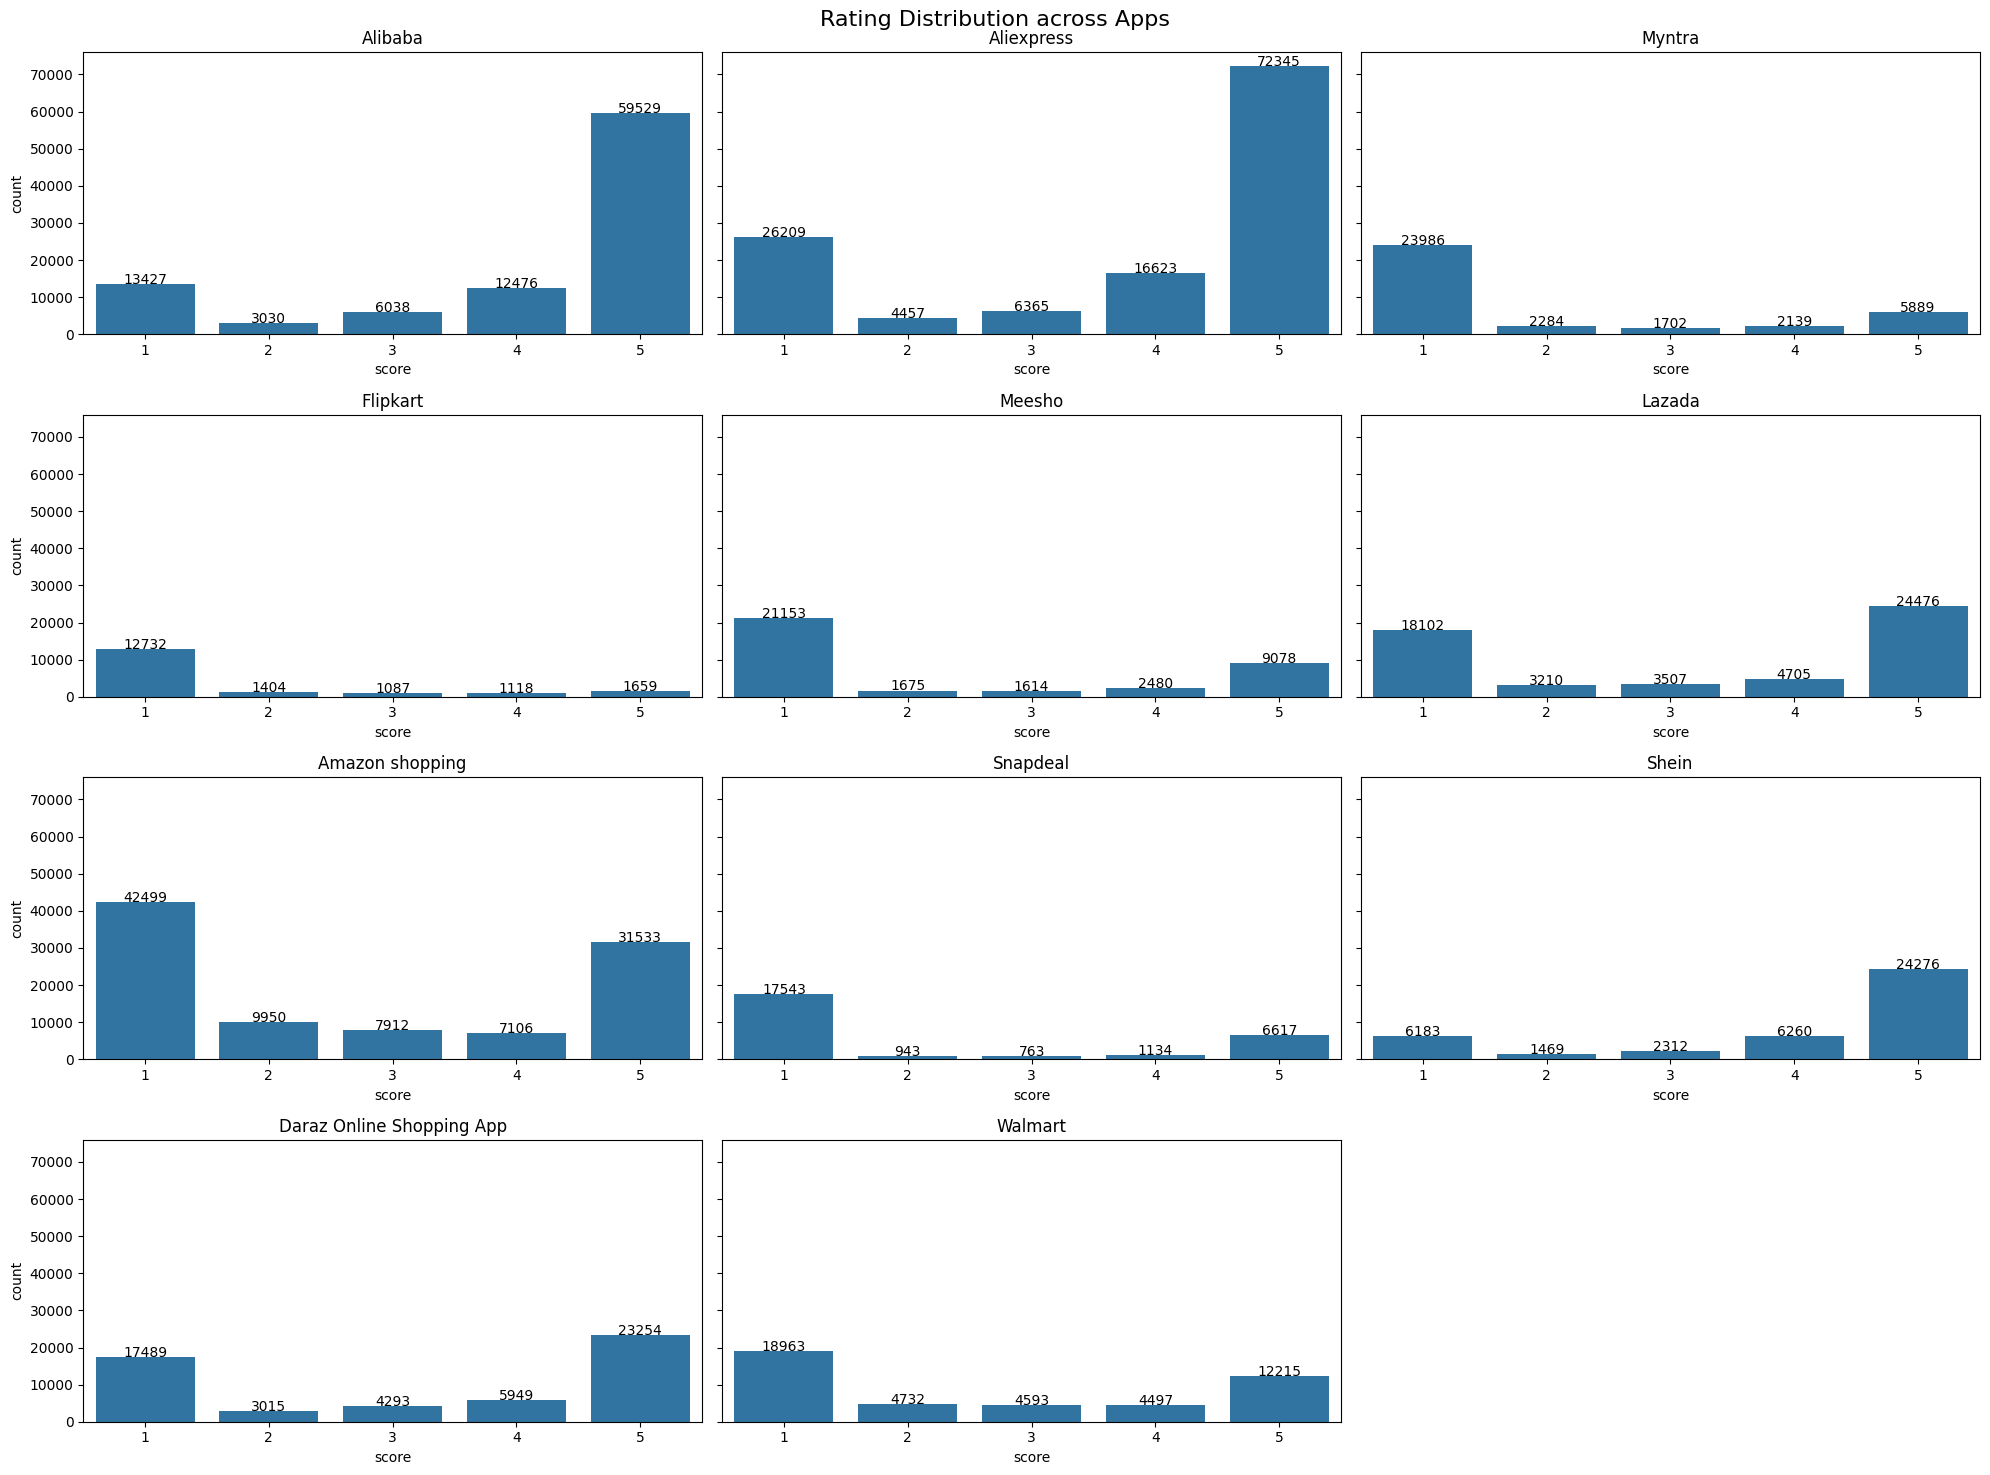

In [ ]:
import seaborn as sns

# Rating Distribution across Apps
full_data["score"] = full_data["score"].astype(int)
app_names = full_data["appName"].unique()

rows, cols = 4, 3
fig, axes = plt.subplots(rows, cols, figsize=(20, 15), sharey=True)
axes = axes.flatten()

for i, name in enumerate(app_names):
    sns.countplot(data = full_data[full_data["appName"] == name], x = "score", ax = axes[i])
    axes[i].set_title(name)
    plt.xlabel("Rating")
    plt.ylabel("Count")

    #Annotate bar heights
    for p in axes[i].patches:
        height = p.get_height()
        if height > 0:
            axes[i].text(p.get_x() + p.get_width() / 2., height + 3, f'{int(height)}', ha="center")

# Delete unused subplots
for i in range(len(app_names), rows * cols):
    fig.delaxes(axes[i])

plt.suptitle("Rating Distribution across Apps", fontsize=16)
plt.tight_layout()
plt.show()

In [ ]:
def get_sentiment_level(x):
    if x == 3:
        return "Neutral"
    elif x > 3:
        return "Positive"
    else:
        return "Negative"

full_data["sentiment"] = full_data["score"].apply(get_sentiment_level)
full_data.head()

,reviewId,content,score,thumbsUpCount,at,replyContent,repliedAt,appName,Alibaba,Aliexpress,Daraz Online Shopping App,Myntra,Lazada,Amazon shopping,Flipkart,Meesho,Walmart,Shein,Snapdeal,sentiment
0,275f465b-a58b-439e-ae7c-f9f6dcf2634d,Trying to use the on website is almost impossi...,1,39.0,1.720996e+12,"Hi, we are sorry to hear that. Do share additi...",1.721048e+12,Alibaba,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Negative
1,e6c13852-277e-451a-b8d5-dd92aea75402,Had to uninstall due to the amount of notifica...,3,60.0,1.720502e+12,"Hi, we are sorry to hear that. Do share additi...",1.721051e+12,Alibaba,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Neutral
2,254b3705-c54b-4ce4-8982-5b468d38231d,I order and it takes too long the shpping days...,1,7.0,1.721866e+12,NaN,NaN,Alibaba,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Negative
3,c83c1e64-6aa3-42e8-9a56-0385a297b87b,Buyer beware! They have tons of listings that ...,1,2301.0,1.611569e+12,NaN,NaN,Alibaba,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Negative
4,7a65dce8-3f09-4e4e-a263-55efebc13c65,It's all around a great app except for the fac...,4,1859.0,1.545438e+12,Thanks for your feedback. Could you tell us mo...,1.515586e+12,Alibaba,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Positive


<ipython-input-11-e6b467b1070b>:7: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=top_apps.index, y=top_apps.values, palette="viridis")


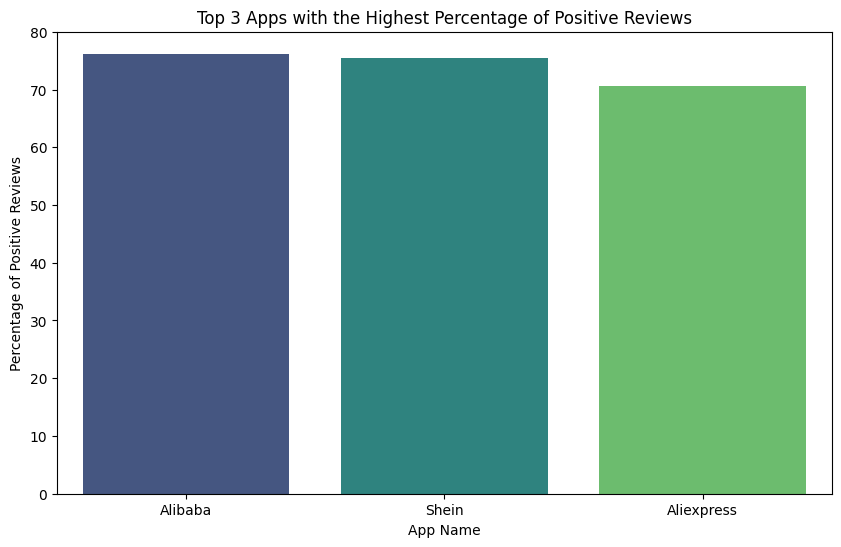

In [ ]:
# plotting the top 3 apps with the highest percentage of positive reviews
positive_percentage_per_app = full_data["sentiment"].groupby(full_data["appName"]).apply(lambda x: (x == "Positive").mean() * 100)
positive_percentage_per_app = positive_percentage_per_app.sort_values(ascending=False)
top_apps = positive_percentage_per_app.head(3)

plt.figure(figsize=(10, 6))
sns.barplot(x=top_apps.index, y=top_apps.values, hue=top_apps.index, legend=False)
plt.title("Top 3 Apps with the Highest Percentage of Positive Reviews")
plt.xlabel("App Name")
plt.ylabel("Percentage of Positive Reviews")
plt.show()

# Sentiment analysis of Reviews

In [ ]:
full_data = full_data.drop(columns=["sentiment"]) # dropping sentiment column to prepare for NLP based sentiment

In [ ]:
!pip install nltk
!pip install vaderSentiment

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 126.0/126.0 kB 2.4 MB/s eta 0:00:00


In [ ]:
import nltk
nltk.download('vader_lexicon')
from nltk.sentiment.vader import SentimentIntensityAnalyzer
import re

analyzer = SentimentIntensityAnalyzer()

def analyze_sentiment(text):
    text = re.sub(r'[^\w\s]', '', text)
    scores = analyzer.polarity_scores(text)
    compound_score = scores['compound']
    if compound_score >= 0.05:
        return 'Positive'
    elif compound_score <= -0.05:
        return 'Negative'
    else:
        return 'Neutral'

full_data['sentiment'] = full_data['content'].apply(analyze_sentiment)
full_data[["content", "sentiment"]].head()

[nltk_data] Downloading package vader_lexicon to /root/nltk_data...


KeyError: "['Content'] not in index"

In [ ]:
sentiment_map = {"Positive": 1, "Neutral": 0, "Negative": -1}
full_data["sentiment"] = full_data["sentiment"].map(sentiment_map)
full_data.head()

### Clustering based on review length and sentiment

In [ ]:
full_data["review_length"] = full_data["content"].apply(lambda x: len(x))
clustering_data = full_data[["review_length", "sentiment"]]

### Clustering using Kmeans
- Preprocessing data (Normalizing Features)
- KMeans Clustering

In [ ]:
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans
SEED = 42

scaler = StandardScaler()
clustering_data_scaled = scaler.fit_transform(clustering_data)

model = KMeans(n_clusters=3, random_state=SEED)
labels = model.fit_predict(clustering_data_scaled)

full_data["cluster_labels"] = labels

In [ ]:
full_data[["appName", "review_length", "sentiment", "cluster_labels"]].head()

In [ ]:
sentiment_counts = full_data.groupby(["appName", "sentiment"]).size().reset_index(name="count")

plt.figure(figsize=(16, 10))

sns.barplot(data=sentiment_counts, x="appName", y="count", hue="sentiment")
plt.xlabel("App Name")
plt.ylabel("Review Count")
plt.xticks(rotation=45, fontsize=10)
plt.legend(title="Sentiment", loc="upper right")
plt.tight_layout()
plt.show()